In [2]:
# 加载数据集
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]] # array(150,2)
y = iris.target  # array(150,) 1行150列
np.unique(y)

array([0, 1, 2])

In [3]:
# 数据划分及标准化
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
# 对数据进行标准化处理（x-u)/sigma
# 注意对训练集及测试集都使用训练集的缩放参数进行处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/home/liuchao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# svm实例化
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)  # 线性核, random_state随机数种子，用于复现结果，C为惩罚系数，用于防止过拟合
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
svm.coef_

array([[-1.21127505, -1.19362058],
       [-0.64804624, -0.64137972],
       [-1.62334168, -2.12665936]])

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_result(X, y, test_idx=None, classifier=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1min = X[:,0].min() - 1
    x1max = X[:,0].max() + 1
    x2min = X[:,1].min() - 1
    x2max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    for idx, c1 in enumerate(np.unique(y)): # c1为类别
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='y', alpha=1.0, linewidth=1, marker='v', s=55, label="test set")

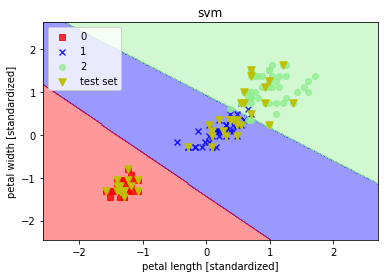

In [6]:
# 数据可视化
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_result(X_combined_std, y_combined_std, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('svm')
plt.legend(loc='upper left')
plt.show()

In [7]:
# 随机种子的作用
np.random.seed(1)  # 随机数种子，在多次运行时保持随机数一致（同一次运行时内部随机数会发生变化）
X_xor = np.random.randn(10, 2)
print(X_xor)
X_xor = np.random.randn(10, 2)
print(X_xor)

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]]
[[-1.10061918  1.14472371]
 [ 0.90159072  0.50249434]
 [ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]
 [-0.69166075 -0.39675353]
 [-0.6871727  -0.84520564]
 [-0.67124613 -0.0126646 ]
 [-1.11731035  0.2344157 ]
 [ 1.65980218  0.74204416]]


In [8]:
np.random.seed(1)
X_xor = np.random.randn(10, 2)
print(X_xor)
X_xor = np.random.randn(10, 2)
print(X_xor)

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]]
[[-1.10061918  1.14472371]
 [ 0.90159072  0.50249434]
 [ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]
 [-0.69166075 -0.39675353]
 [-0.6871727  -0.84520564]
 [-0.67124613 -0.0126646 ]
 [-1.11731035  0.2344157 ]
 [ 1.65980218  0.74204416]]


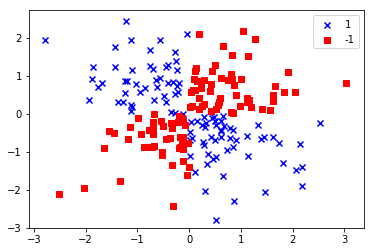

In [9]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label=1) # 数组过滤
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label=-1) # 数组过滤
plt.ylim(-3.0)
plt.legend()
plt.show()

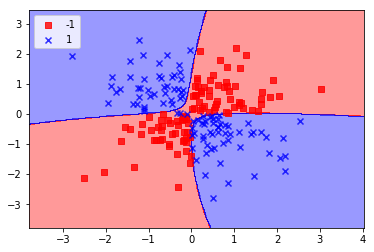

In [10]:
"""非线性svm"""
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=100.0)
svm.fit(X_xor, y_xor)
plot_result(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

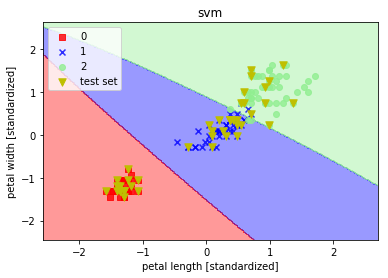

In [11]:
"""比较gamma对于结果的影响"""
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0)
svm.fit(X_train_std, y_train)
plot_result(X_combined_std, y_combined_std, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('svm')
plt.legend(loc='upper left')
plt.show()

In [12]:
# svm实战

In [13]:
def load_data(file):
    f = open(file)
    data_set = []
    label_set = []
    # 将数字转换为浮点型，否则会报错
    for l in f:
        line = l.strip().split('\t')
        data_set.append([float(line[0]), float(line[1])])
        label_set.append(float(line[2]))
    return np.array(data_set), np.array(label_set)

In [14]:
# 数据分组及标准化
X, y = load_data()
X = np.mat(X)  # X可以为array可以为矩阵
# y = np.mat(y)  # label必须为array(1行n列)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
# 对数据进行标准化处理（x-u)/sigma
# 注意对训练集及测试集都使用训练集的缩放参数进行处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

TypeError: load_data() missing 1 required positional argument: 'file'

In [ ]:
# 模型训练
svm = SVC(kernel='linear', C=1.0, random_state=0)  # 线性核, random_state随机数种子，用于复现结果，C为惩罚系数，用于防止过拟合
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

In [ ]:
# 可视化
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_result(X_combined_std, y_combined_std, classifier=svm, test_idx=None)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('svm')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 预测准确率
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [ ]:
# 非线性SVM

In [ ]:
# 数据分组及标准化
X_train, y_train = load_data('data/testSetRBF.txt')
# X = np.mat(X)  # X可以为array可以为矩阵
# y = np.mat(y)  # label必须为array(1行n列)
X_test, y_test = load_data('data/testSetRBF2.txt')
# 对数据进行标准化处理（x-u)/sigma
# 注意对训练集及测试集都使用训练集的缩放参数进行处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# 模型训练
svm = SVC(kernel='rbf', random_state=0)  # 非线性核, random_state随机数种子，用于复现结果，C为惩罚系数，用于防止过拟合
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

In [ ]:
# 可视化
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
plot_result(X_combined_std, y_combined_std, classifier=svm, test_idx=None)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('svm')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 预测准确率
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [ ]:
# 手写数字识别（多分类0-9）
import re
def file2vector(filename):
    """将数字矩阵转换为一维向量"""
    f = open(filename)
    vector = list() # 创建一个空矩阵
    classLabel = re.findall('(\d+)_\d+\.txt', filename)[0]
    classLabel = int(classLabel)
    for l in f:
        line = l.strip()
        for i in line:
            vector.append(int(i))
    vector = np.array(vector)
    return vector, classLabel

In [ ]:
from os import path, listdir
def load_data(filepath):
    files = listdir(filepath)
    datamat = np.empty((0, 1024))
    labellist = list()
    for file in files:
        filename = path.join(filepath, file)
        vector, classLable = file2vector(filename)
        datamat = np.row_stack([datamat, vector]) # 一定不要忘了重新赋值
        labellist.append(classLable)
    labellist = np.array(labellist)
    return datamat, labellist

In [ ]:
# 数据分组及标准化
X_train, y_train = load_data('data/trainingDigits')
# X = np.mat(X)  # X可以为array可以为矩阵
# y = np.mat(y)  # label必须为array(1行n列)
X_test, y_test = load_data('data/testDigits')
# 对数据进行标准化处理（x-u)/sigma
# 注意对训练集及测试集都使用训练集的缩放参数进行处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# 模型训练
svm = SVC(kernel='rbf', random_state=0)  # 非线性核, random_state随机数种子，用于复现结果，C为惩罚系数，用于防止过拟合
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

In [ ]:
# 预测准确率
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [15]:
svm.coef_

AttributeError: coef_ is only available when using a linear kernel

In [16]:
??SVC